In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
!wget https://raw.githubusercontent.com/dhrim/cau_2022_summer/master/material/deep_learning/car_classification.csv

--2022-07-22 03:40:58--  https://raw.githubusercontent.com/dhrim/cau_2022_summer/master/material/deep_learning/car_classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54766 (53K) [text/plain]
Saving to: ‘car_classification.csv’

car_classification. 100%[===================>]  53.48K  --.-KB/s    in 0.007s  

2022-07-22 03:40:58 (6.99 MB/s) - ‘car_classification.csv’ saved [54766/54766]



In [5]:
raw_data = pd.read_csv("car_classification.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,:7]
y = data[:,7]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [6]:
print(train_x[:5])
print(train_y[:5])

[[ 0.21192569 -0.86291079 -0.51997236 -0.42787455 -0.30325336 -0.05122635
   0.54846706]
 [-1.08211534  1.48205303  1.48683159  1.57258478  0.84225766 -1.4648516
  -1.6232409 ]
 [-0.18525522  0.30957112  0.29230543 -0.11611465  0.30070055 -0.05122635
   0.00554007]
 [-1.21023822  1.48205303  2.49023356  3.13138426  0.12763773 -2.00855363
  -1.6232409 ]
 [-0.31337809  0.30957112 -0.37662922  0.06574528 -0.59522329 -0.55868157
  -0.80885042]]
[0. 0. 0. 0. 0.]


In [7]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 7)
(313,)
(79, 7)
(79,)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 3s 106ms/step - loss: 1.1119 - acc: 0.2598 - val_loss: 1.0325 - val_acc: 0.2500
Epoch 2/1000
3/3 [==============================] - 0s 16ms/step - loss: 1.0805 - acc: 0.2669 - val_loss: 1.0063 - val_acc: 0.3125
Epoch 3/1000
3/3 [==============================] - 0s 17ms

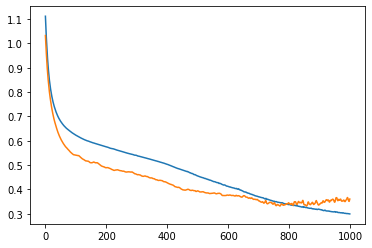

3/3 [==============================] - 0s 5ms/step - loss: 0.4859 - acc: 0.8101
loss= 0.48591721057891846
acc= 0.8101266026496887


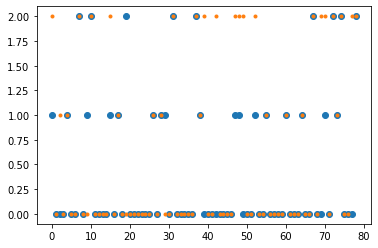

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(7,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)



y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()